In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

# Some plotting functions

In [2]:
def plot_posterior_predictive(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_forecast(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    #axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    #axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast_fin(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_fin_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot(index, mean, label="Mean", color="purple")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [6]:
def plot_forecast_small(fcast_model, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

# Results for Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 140 seconds.


failed for 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 136 seconds.


failed for 1m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 130 seconds.


failed for 5000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 132 seconds.


failed for Marathon


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 126 seconds.


failed for 10000m


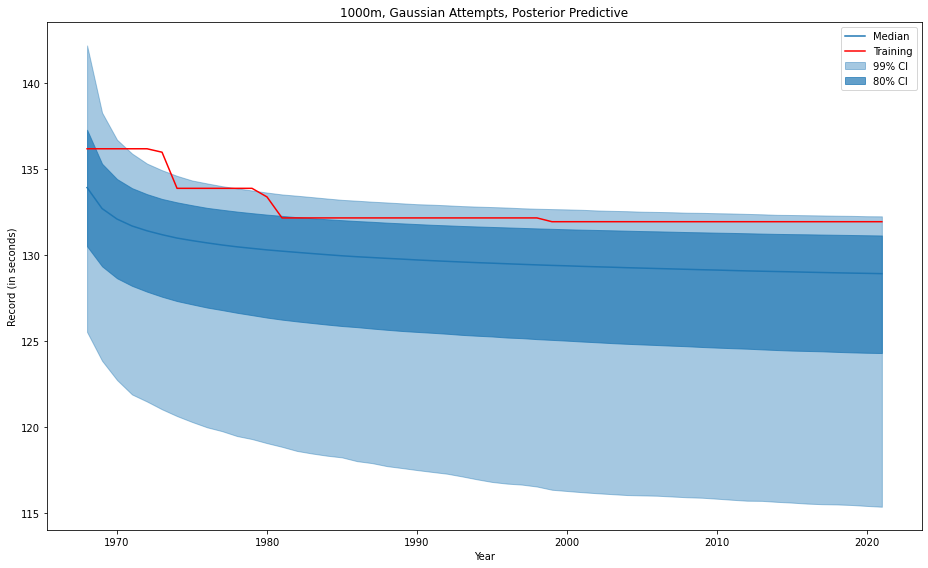

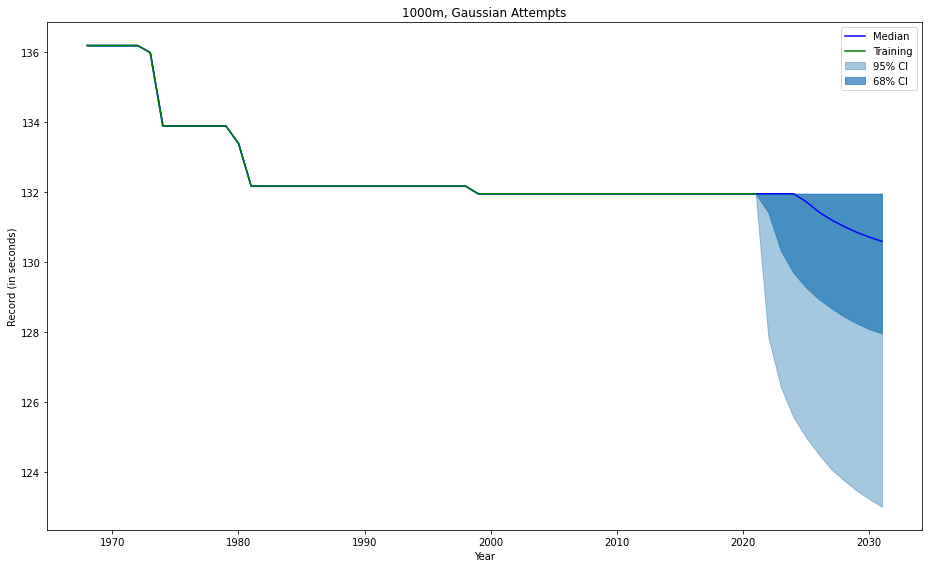

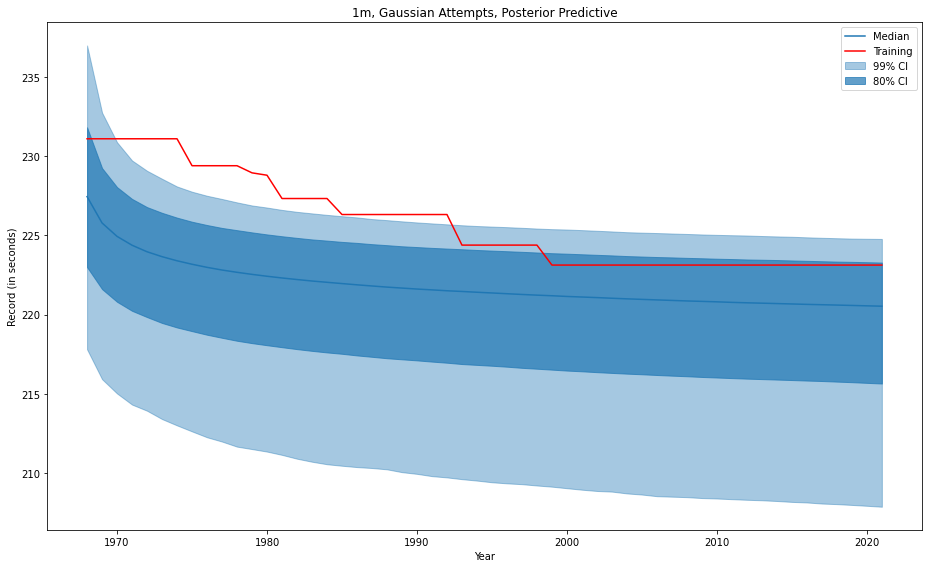

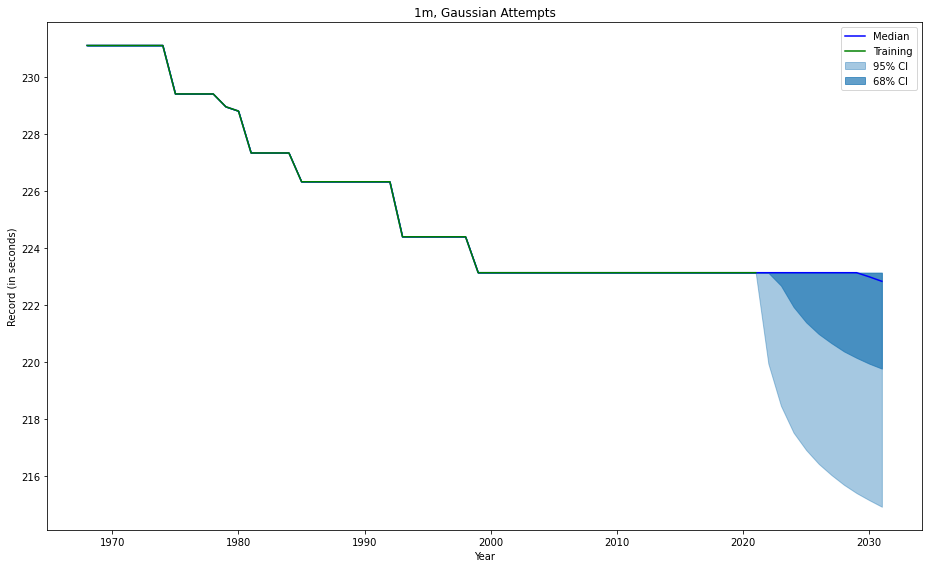

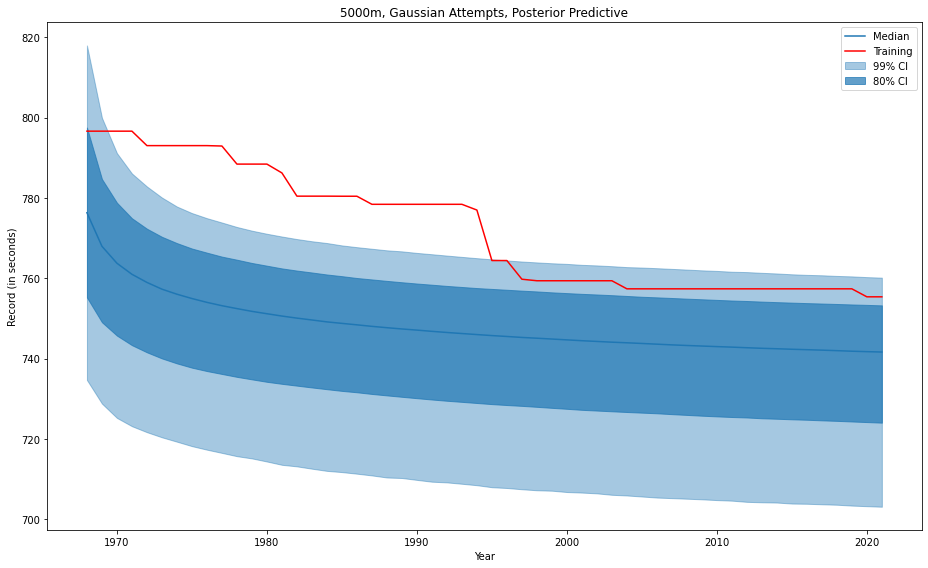

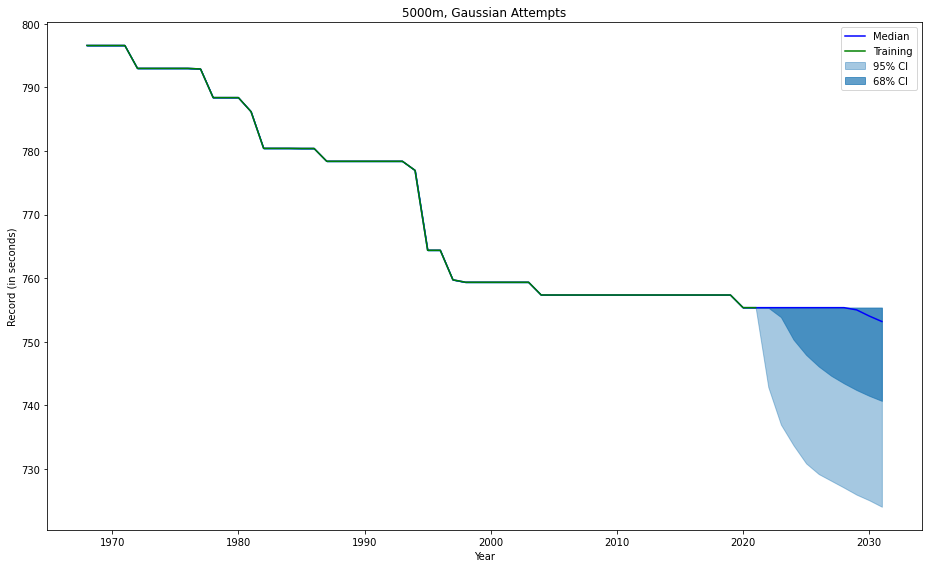

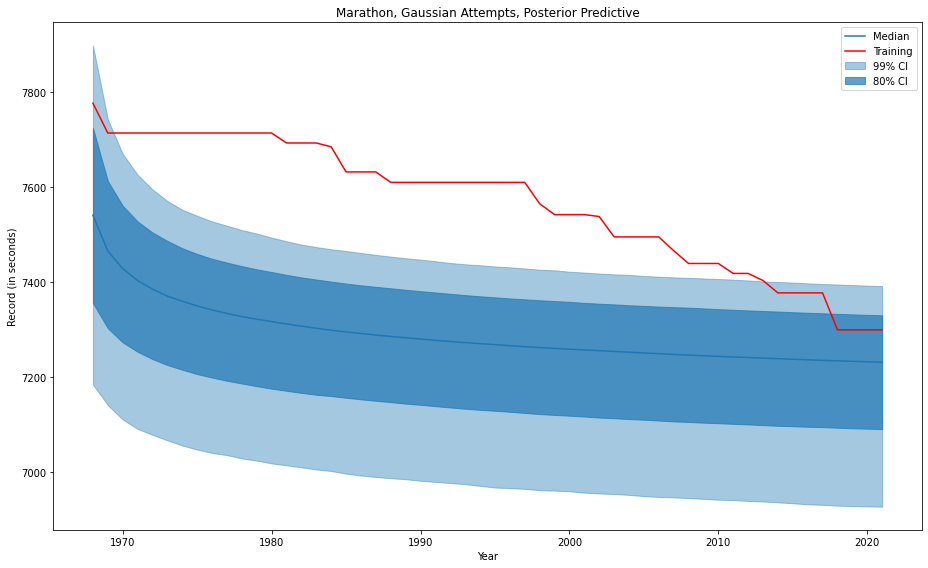

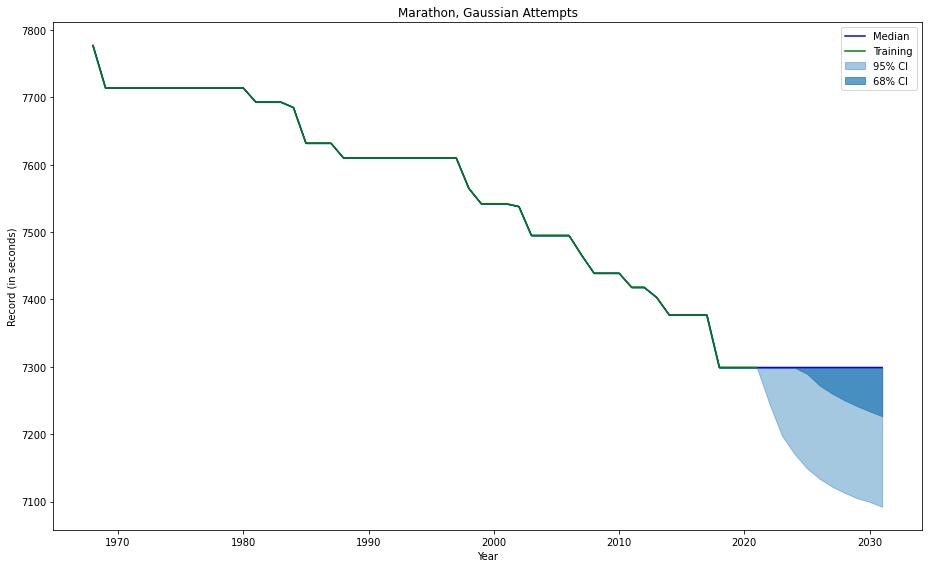

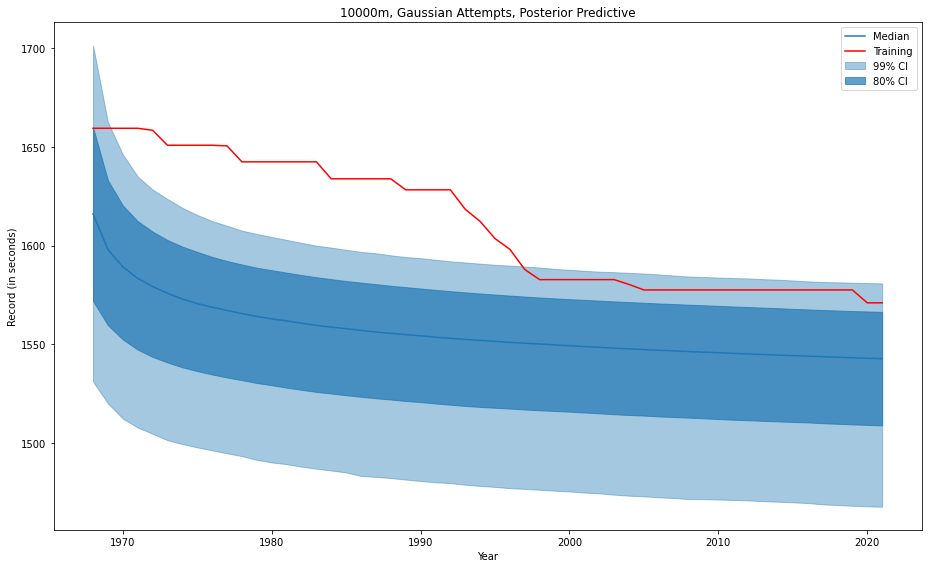

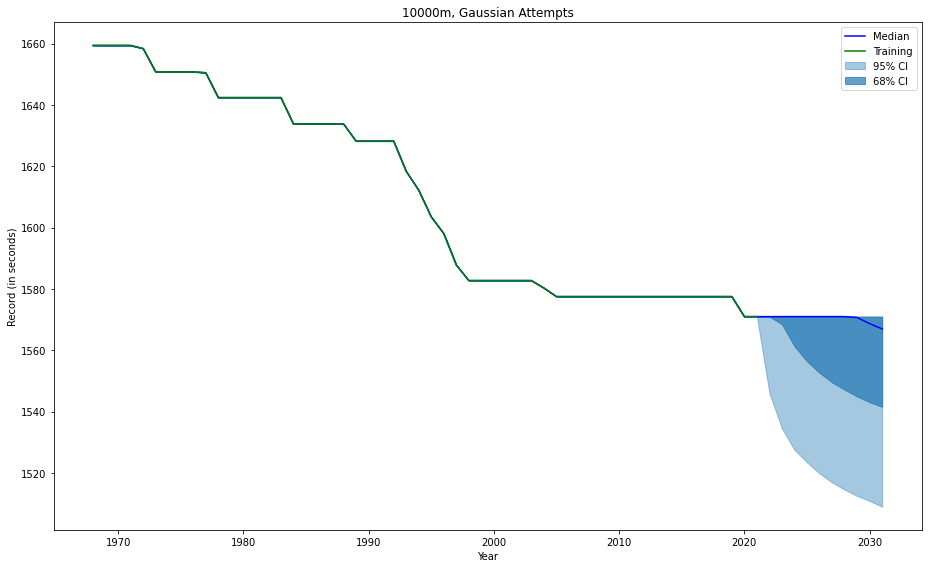

In [7]:
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ['20000m']
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = ["1000m", "1m", "5000m", "Marathon"]
#whiches = ["1000m"]
#whiches = ["1000m"]
#whiches = ['1m']
#whiches = ['Marathon']

mses = {}
avg_log_probs = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}


fails = []

for which in whiches:
  try:
    # df = pd.read_csv("tryfos_data.csv")
    # years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    # actual_df = pd.read_csv("tryfos_actual.csv")
    # _, actual_records = actual_df["Year"].values, actual_df[which].values

    df = pd.read_csv('tryfos_until_present.csv')
    years, records = df["Year"].values, df[which].values

    training_years = years
    training_records = records
    # tryfos_years = years[15:]
    # tryfos_fcast = records[15:]

    prior_parameters = {
              'mu' : {
                'mean' : training_records[0],
                'std' : 100*training_records[0],
              },
              'sigma' : {
                'lam' : 1.0/100.0
              }
            }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", 
                                kind="min", train='all', fcast_len=10, fcast_test_data=None)
                                
    model.fit(chains=10, draws=5000)
    model.posterior_predictive()
    model.forecast()

    # # MSE calculation
    # median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    # bayes_mse = fm.mse(median, model.fcast_test_data)
    # tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    # baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    # baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    # mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

    # # Average logp
    # avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])
    
    sample_paths = model.forecast_samples

    s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
    s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
    s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
    s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
    s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
    mean = np.mean(sample_paths, axis=0)

    s5_quantiles[which] = s5_quant
    s15_quantiles[which] = s15_quant
    s50_quantiles[which] = s50_quant
    s85_quantiles[which] = s85_quant
    s95_quantiles[which] = s95_quant
    means[which] = mean


    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
    fig.savefig(f"predictions/gauss/{which}_gaussian_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin(model,  f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/final_{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model,  f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/final_{which}_gaussian_attempts_forecast_w_mean.png")

    fig = plot_forecast_small(model, f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/s_final_{which}_gaussian_attempts_forecast.png")


  except:
    print(f"failed for {which}")
    fails.append(which)

In [8]:
mses

{}

In [9]:
avg_log_probs

{}

In [10]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)
print(means)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 129.22536229, 127.97071813,
       127.24950205, 126.71355986, 126.26530144, 125.9102999 ,
       125.67049857, 125.43503874, 125.219749

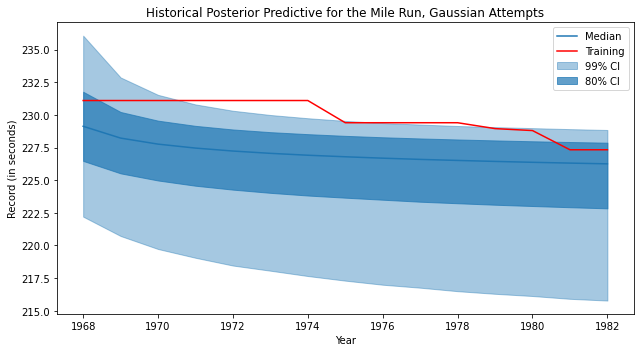

In [58]:
fig = plot_posterior_predictive(model, f"Historical Posterior Predictive for the Mile Run, Gaussian Attempts", figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_post_pred_mile_run.png")

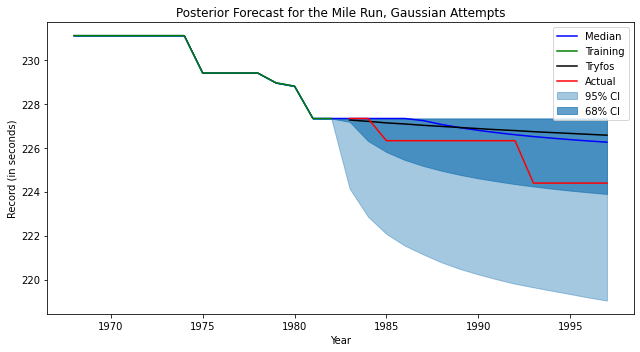

In [59]:
fig = plot_forecast_fin(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gaussian Attempts", actual_records, figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_fcast_mile_run.png")

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_225516/1981564619.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


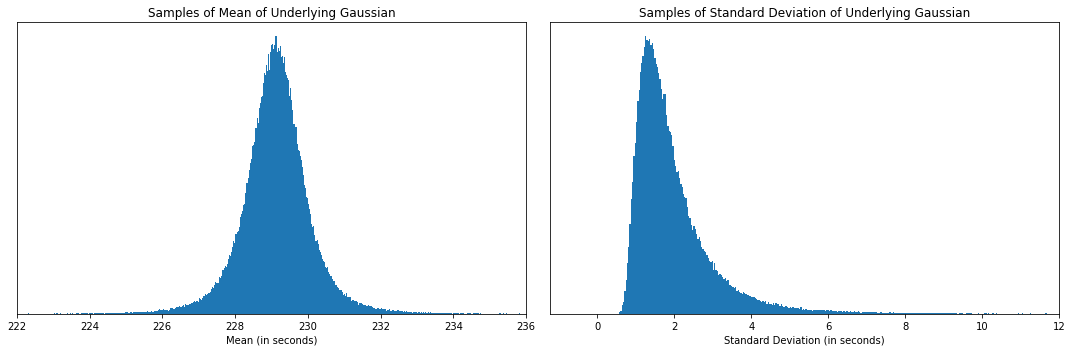

In [80]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gaussian')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(222, 236)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gaussian')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,12)

fig.tight_layout()

fig.savefig(f"gauss_results/article_gaussian_attempts_posterior_hist.png")

fig.show()

In [82]:
import arviz as az

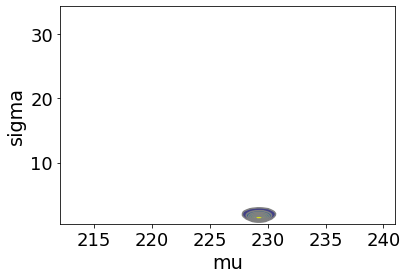

In [88]:
az.plot_pair(model.trace,
            kind='kde',
            var_names=['mu', 'sigma'],
            backend_kwargs
            textsize=18)
    
plt.show()

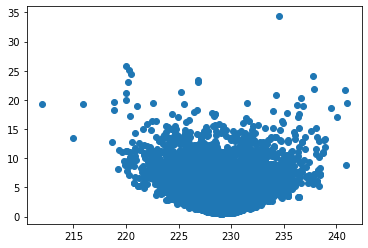

In [81]:
plt.scatter([model.trace.posterior.mu.values.flatten()], model.trace.posterior.sigma.values.flatten())

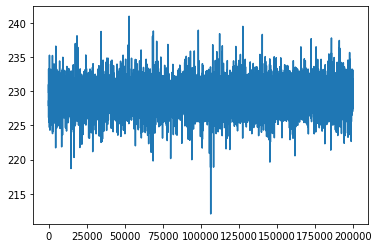

In [73]:
plt.plot(model.trace.posterior.mu.values.flatten())

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 151 seconds.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 153 seconds.
There were 221 divergences after tuning. Increase `target_accept` or reparameterize.
There were 454 divergences after tuning. Increase `target_accept` or reparameterize.
There were 689 divergences after tuning. Increase `target_accept` or reparameterize.
There were 908 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1062 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9198419285909906, but should be close to 0.99. Try to increase the number of tuning steps.
There were 1292 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1517 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1657 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1883 divergences after tuning. Increase `tar

Error: failed on 1m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 131 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some par

Error: failed on 5000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 228 seconds.
There were 1017 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2090 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3133 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4321 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5413 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6554 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7775 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8925 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10049 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11273 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective sample

Error: failed on Marathon


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 202 seconds.
There were 894 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1852 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2908 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3821 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4924 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6011 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7037 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8014 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8908 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10018 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples 

Error: failed on 10000m


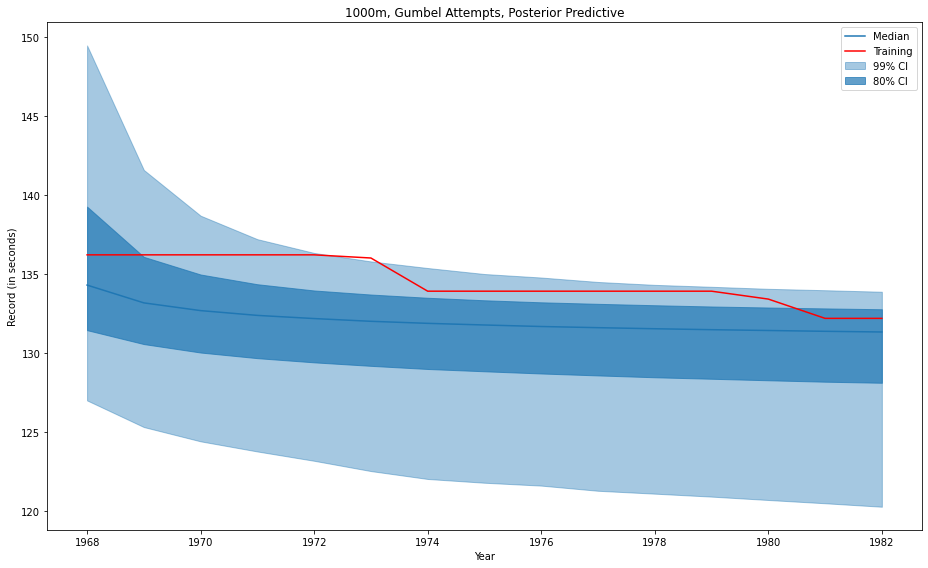

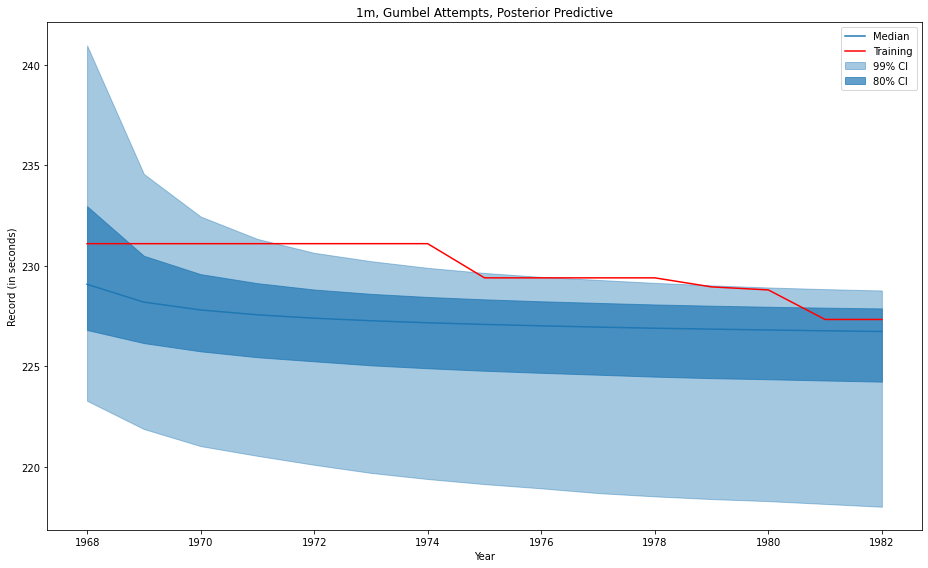

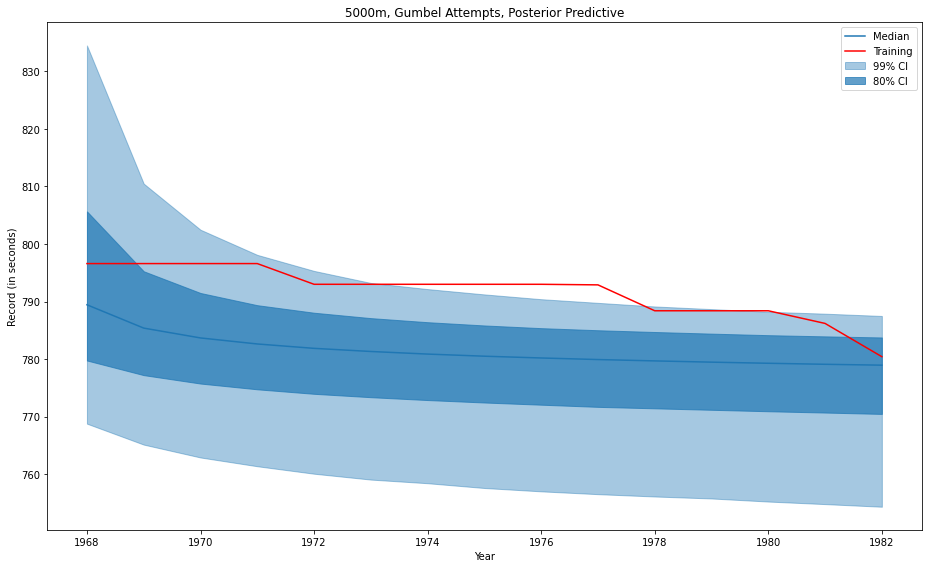

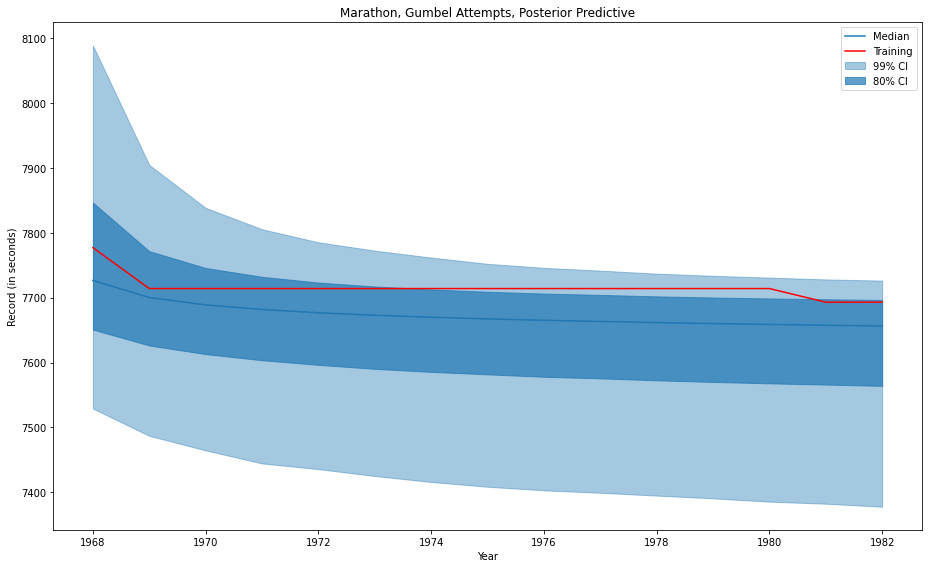

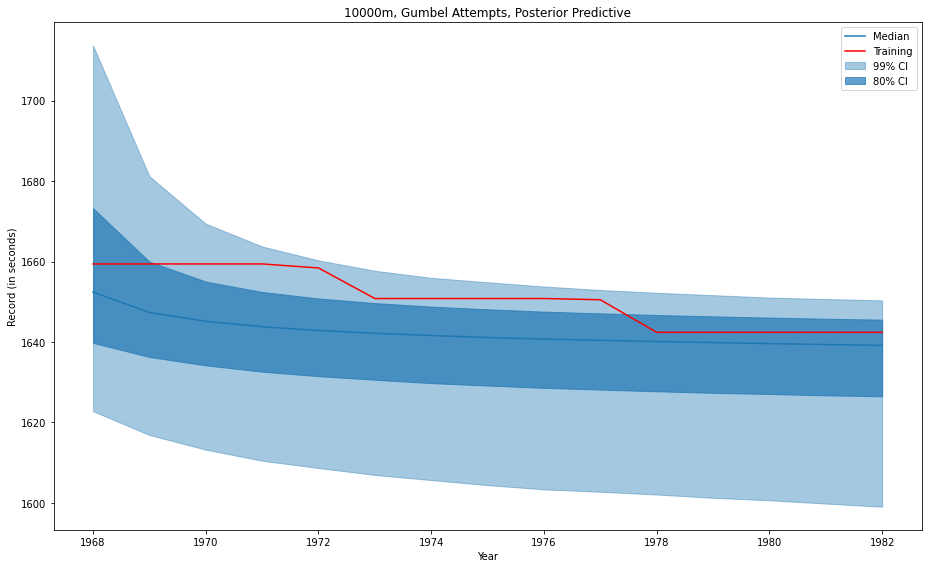

In [11]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

mses = {}
avg_log_probs = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 100*training_records[0],
                },
                'sigma' : {
                    'lam' : 1.0/100.0
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        
        model.fit(chains=10, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

        sample_paths = model.forecast_samples

        s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
        s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
        s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
        s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
        s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
        mean = np.mean(sample_paths, axis=0)

        s5_quantiles[which] = s5_quant
        s15_quantiles[which] = s15_quant
        s50_quantiles[which] = s50_quant
        s85_quantiles[which] = s85_quant
        s95_quantiles[which] = s95_quant
        means[which] = mean


        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [12]:
mses

{'1000m': (0.2600478569750678, 0.30973333333333847, 0.0),
 '1m': (2.3702642786686563, 1.9230733333333596, 3.425253333333406),
 '5000m': (55.65262965972257, 43.3707066666667, 65.49352666666633),
 'Marathon': (2431.1169390410014, 3500.8, 5341.133333333333),
 '10000m': (526.2020918783065, 496.97074666666725, 607.3418133333379)}

In [13]:
avg_log_probs

{'1000m': -2.3418220967653243,
 '1m': -33.519765105382746,
 '5000m': -232.65009887986068,
 'Marathon': -39.321844958211635,
 '10000m': -22112.03027978219}

In [14]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)
print(means)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 130.38891563,
       129.3074389 , 128.7158989 , 128.2513614 , 127.89896298,
       127.60115045, 127.40448258, 127.19452717, 127.0341034 ,
       126.89812297, 126.74662135, 126.6028006 , 126.47687015,
       126.37991507, 126.29454138]), '1m': array([231.1       , 231.1       , 231.1       , 231.1       ,
       231.1       , 231.1       , 231.1       , 229.4       ,
       229.4       , 229.4       , 229.4       , 228.95      ,
       228.8       , 227.33      , 227.33      , 225.92853158,
       225.1159917 , 224.63550322, 224.28740254, 224.03294911,
       223.82639468, 223.62966634, 223.48852733, 223.34602797,
       223.22733166, 223.1335958 , 223.02164764, 222.94113832,
       222.88310304, 222.81751247]), '5000m': array([796.6       

# Weibull

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 39 seconds.


Error: failed on 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 43 seconds.
The acceptance probability does not match the target. It is 0.9698733159426592, but should be close to 0.99. Try to increase the number of tuning steps.


Error: failed on 1m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 5000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 54 seconds.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on Marathon


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 10000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 4_000 draw iterations (10_000 + 8_000 draws total) took 43 seconds.


Error: failed on 20000m


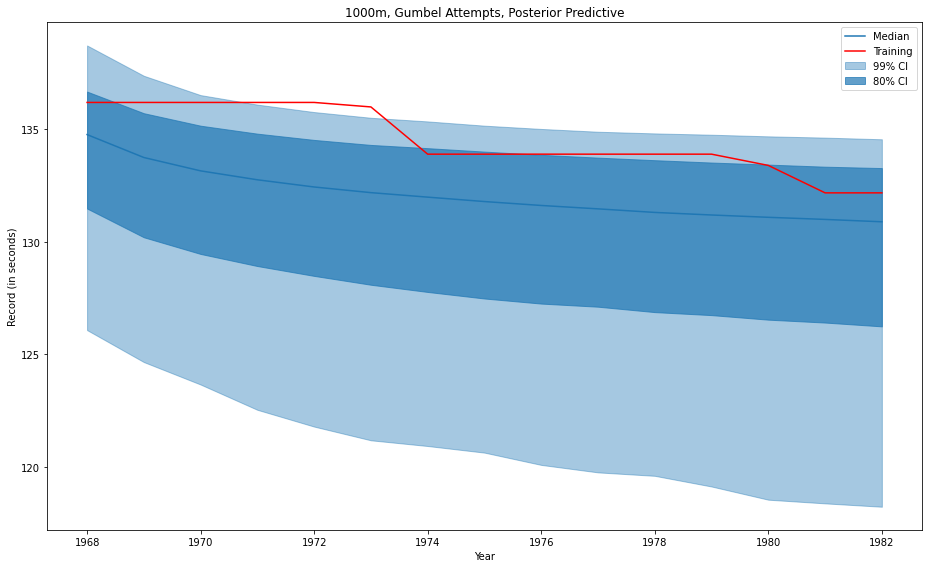

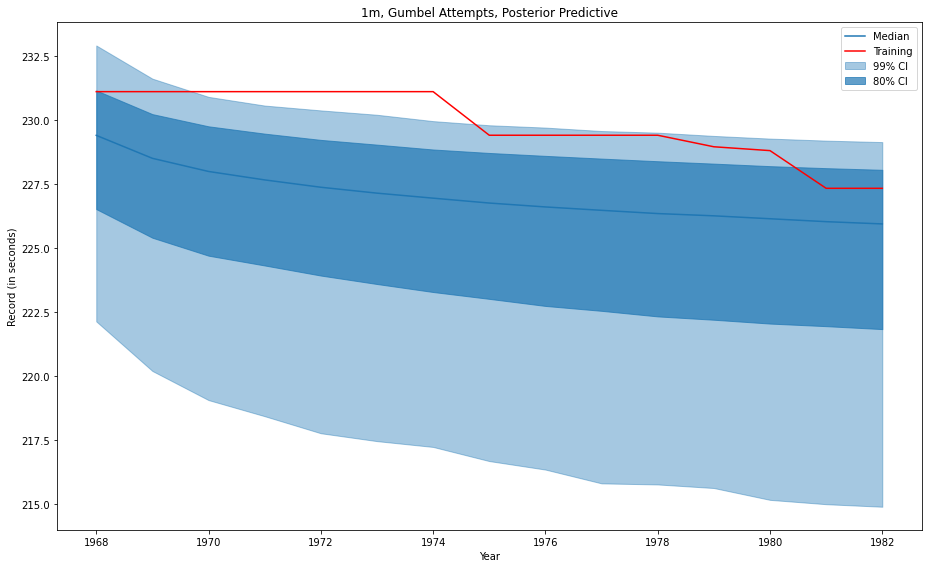

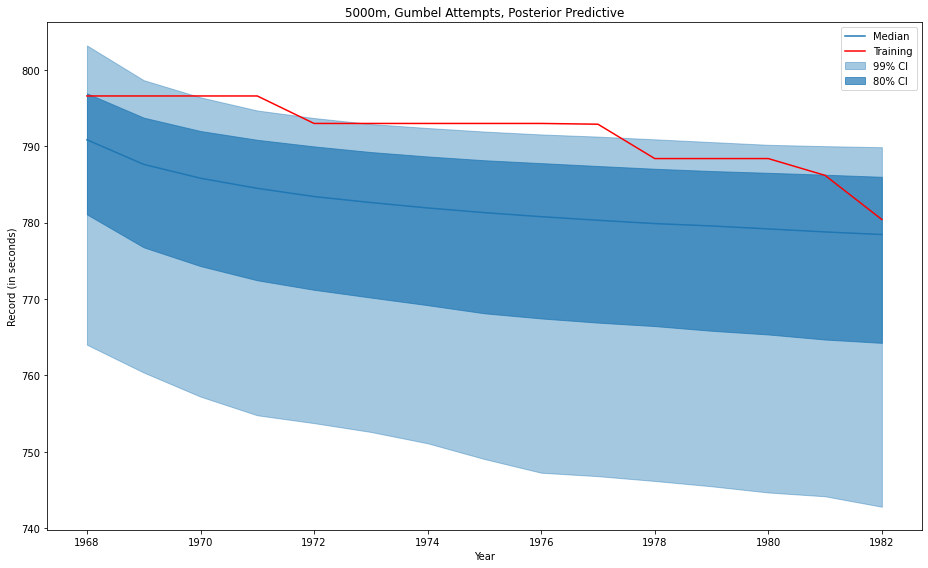

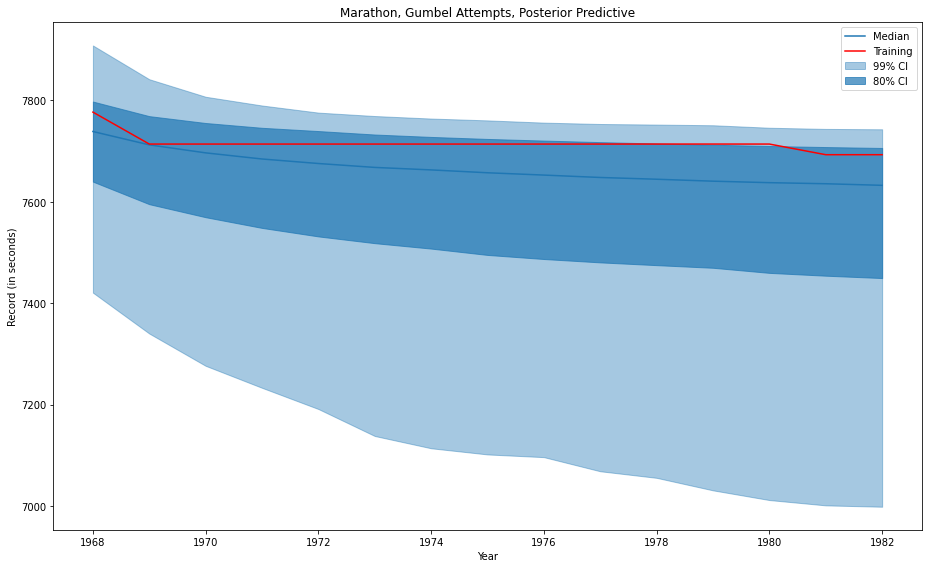

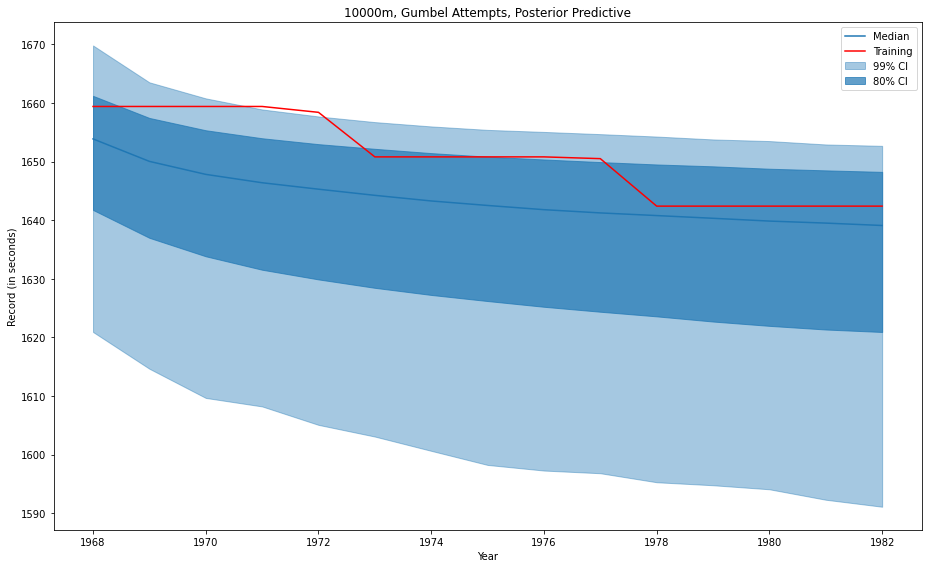

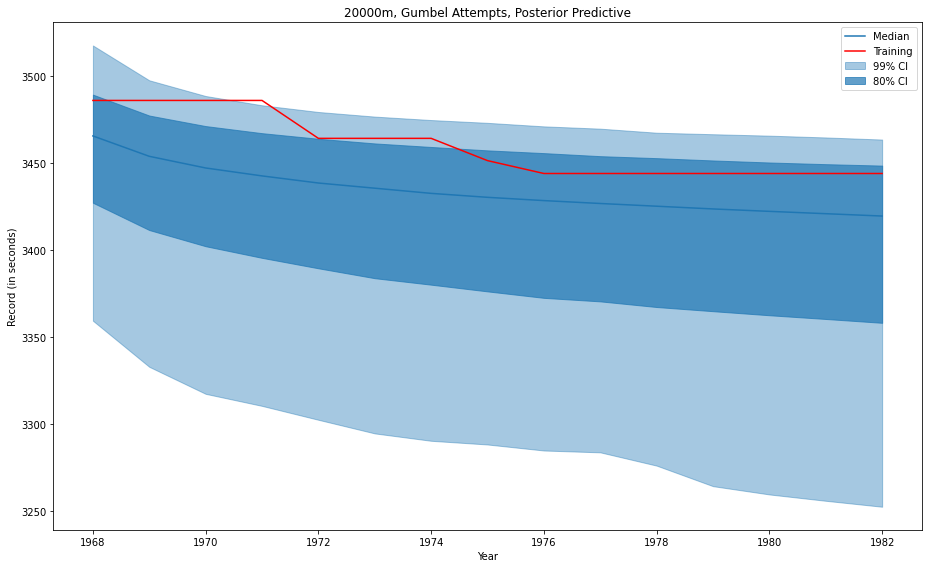

In [7]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", '20000m']
#whiches = []

msesw = {}
avg_log_probsw = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
            }
        }

        model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)


        model.fit(chains=2, draws=4000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        msesw[which] = (bayes_mse, tryfos_mse, baseline_mse)

        # Average logp
        avg_log_probsw[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


        sample_paths = model.forecast_samples

        s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
        s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
        s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
        s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
        s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
        mean = np.mean(sample_paths, axis=0)

        s5_quantiles[which] = s5_quant
        s15_quantiles[which] = s15_quant
        s50_quantiles[which] = s50_quant
        s85_quantiles[which] = s85_quant
        s95_quantiles[which] = s95_quant
        means[which] = mean


        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"weibull/final_{which}_weibull_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/weibull/final_{which}_weibull_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/weibull/final_{which}_weibull_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"weibull/s_final_{which}_weibull_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [16]:
msesw

{'1000m': (0.4898095258205037, 0.30973333333333847, 0.0),
 '1m': (1.3322049265770195, 1.9230733333333596, 3.425253333333406),
 '5000m': (52.85441805955024, 43.3707066666667, 65.49352666666633),
 'Marathon': (1752.719356299782, 3500.8, 5341.133333333333),
 '10000m': (539.0344360494933, 496.97074666666725, 607.3418133333379)}

In [17]:
avg_log_probsw

{'1000m': -2.81130580483022,
 '1m': -10.661173979730128,
 '5000m': -35.892339864763805,
 'Marathon': -26.740011393297024,
 '10000m': -77.44471153725625}

In [18]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)
print(means)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 130.0850945 ,
       128.71243902, 127.88345351, 127.19359445, 126.69904371,
       126.28067397, 125.94954474, 125.64835039, 125.32639784,
       125.13030095, 124.89309689, 124.71363581, 124.54857799,
       124.36124236, 124.18592904]), '1m': array([231.1       , 231.1       , 231.1       , 231.1       ,
       231.1       , 231.1       , 231.1       , 229.4       ,
       229.4       , 229.4       , 229.4       , 228.95      ,
       228.8       , 227.33      , 227.33      , 225.32370018,
       224.09081853, 223.28133185, 222.70090632, 222.24639068,
       221.8874914 , 221.60788402, 221.34127909, 221.11462499,
       220.91131497, 220.71981698, 220.53197304, 220.34678106,
       220.20477142, 220.06793738]), '5000m': array([796.6       